In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("adult 3.csv")


In [5]:
# See the structure
df.info()

# View first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [6]:
# Check for any missing values
print(df.isnull().sum())


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [7]:
df = df.dropna()


In [8]:
df = df.fillna(0)


In [9]:
df['income'] = df['income'].apply(lambda x: 0 if str(x).strip() == '<=50K' else 1)



In [10]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [11]:
X = df.drop('income', axis=1)
y = df['income']


In [12]:
from sklearn.model_selection import train_test_split

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.13305238395620617
R² Score: 0.2586148820771972


In [15]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# Initialize and train Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("🔸 Random Forest Regressor")
print("MSE:", rf_mse)
print("R² Score:", rf_r2)


🔸 Random Forest Regressor
MSE: 0.0980179414900877
R² Score: 0.45383133357386607


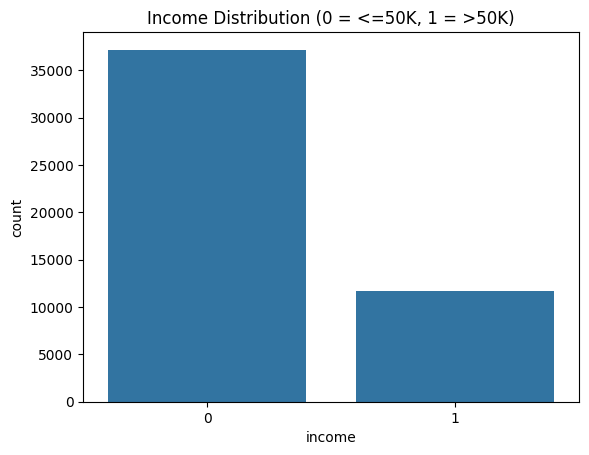

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=df)
plt.title("Income Distribution (0 = <=50K, 1 = >50K)")
plt.show()


In [17]:
# Numeric columns summary
df.describe()


age     workclass        fnlwgt     education  \
count  48842.000000  48842.000000  4.884200e+04  48842.000000   
mean      38.643585      3.870439  1.896641e+05     10.288420   
std       13.710510      1.464234  1.056040e+05      3.874492   
min       17.000000      0.000000  1.228500e+04      0.000000   
25%       28.000000      4.000000  1.175505e+05      9.000000   
50%       37.000000      4.000000  1.781445e+05     11.000000   
75%       48.000000      4.000000  2.376420e+05     12.000000   
max       90.000000      8.000000  1.490400e+06     15.000000   

       educational-num  marital-status    occupation  relationship  \
count     48842.000000    48842.000000  48842.000000  48842.000000   
mean         10.078089        2.618750      6.577700      1.443287   
std           2.570973        1.507703      4.230509      1.602151   
min           1.000000        0.000000      0.000000      0.000000   
25%           9.000000        2.000000      3.000000      0.000000   
50%          10.000000        2.000000      7.000000      1.000000   
75%          12.000000        4.000000     10.000000      3.000000   
max          16.000000        6.000000     14.000000      5.000000   

               race        gender  capital-gain  capital-loss  hours-per-week  \
count  48842.000000  48842.000000  48842.000000  48842.000000    48842.000000   
mean       3.668052      0.668482   1079.067626     87.502314       40.422382   
std        0.845986      0.470764   7452.019058    403.004552       12.391444   
min        0.000000      0.000000      0.000000      0.000000        1.000000   
25%        4.000000      0.000000      0.000000      0.000000       40.000000   
50%        4.000000      1.000000      0.000000      0.000000       40.000000   
75%        4.000000      1.000000      0.000000      0.000000       45.000000   
max        4.000000      1.000000  99999.000000   4356.000000       99.000000   

       native-country        income  
count    48842.000000  48842.000000  
mean        36.749355      0.239282  
std          7.775343      0.426649  
min          0.000000      0.000000  
25%         39.000000      0.000000  
50%         39.000000      0.000000  
75%         39.000000      0.000000  
max         41.000000      1.000000

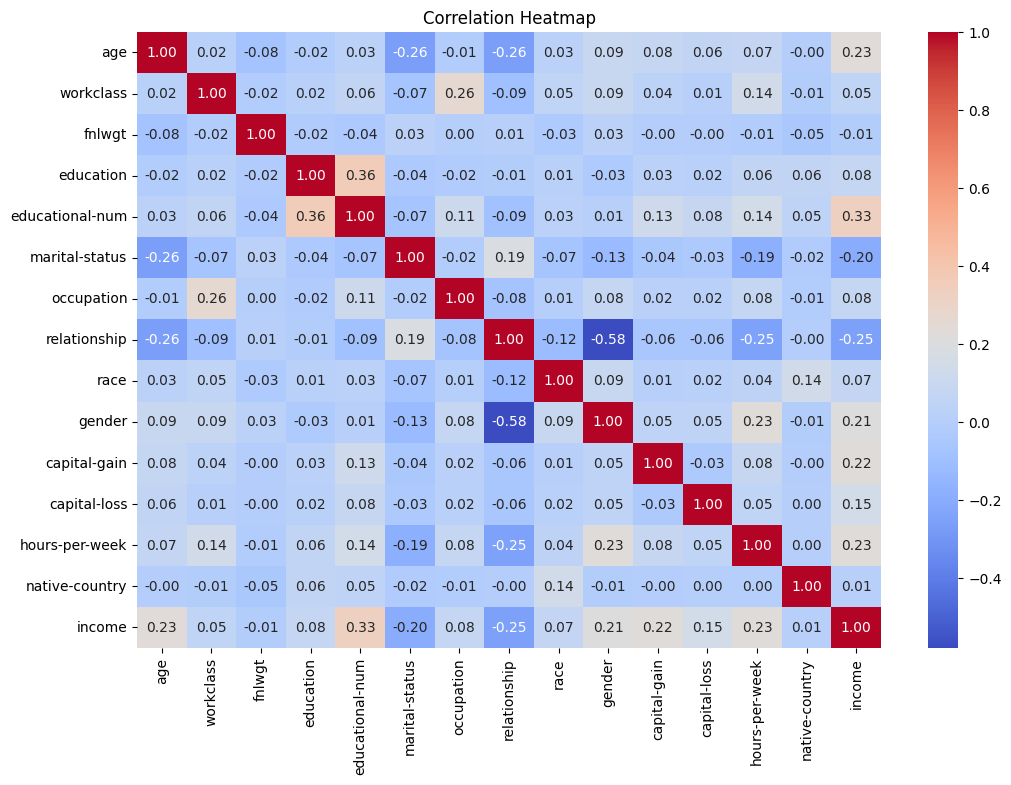

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


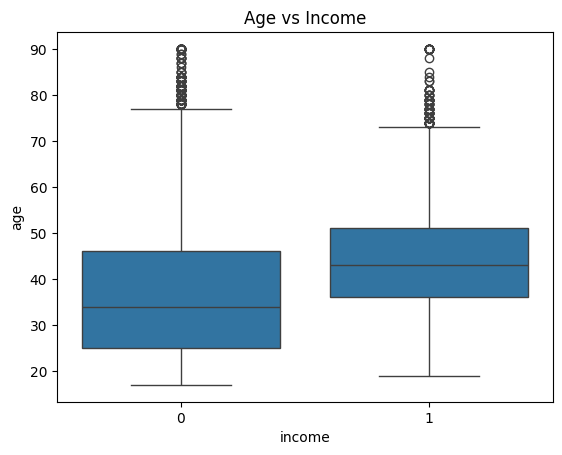

In [19]:
sns.boxplot(x='income', y='age', data=df)
plt.title("Age vs Income")
plt.show()


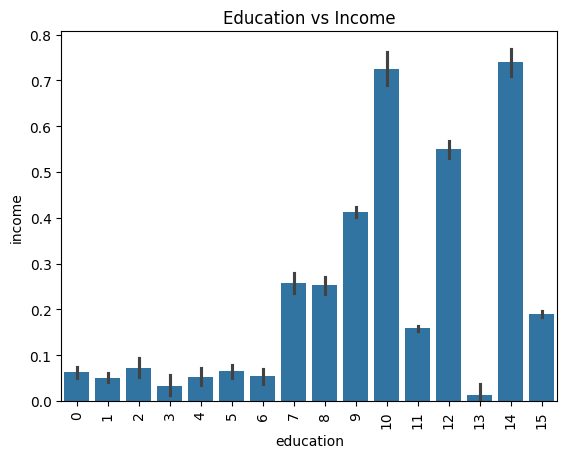

In [20]:
sns.barplot(x='education', y='income', data=df)
plt.xticks(rotation=90)
plt.title("Education vs Income")
plt.show()


In [26]:
import joblib

# Save model and feature columns
X_columns = X.columns.tolist()
joblib.dump((rf_model, X_columns), 'model.pkl')




['model.pkl']